## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [15]:
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [16]:
wine = datasets.load_wine()
boston = datasets.load_boston()

In [23]:
#boston 房價預測問題 ---- 線性迴歸
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=4)
clf = DecisionTreeRegressor(max_depth=4,min_samples_split=20,min_samples_leaf=10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [24]:
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))

Mean squared error: 25.48


In [25]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.04924793 0.         0.         0.         0.         0.66007474
 0.         0.01627178 0.         0.007012   0.         0.
 0.26739355]


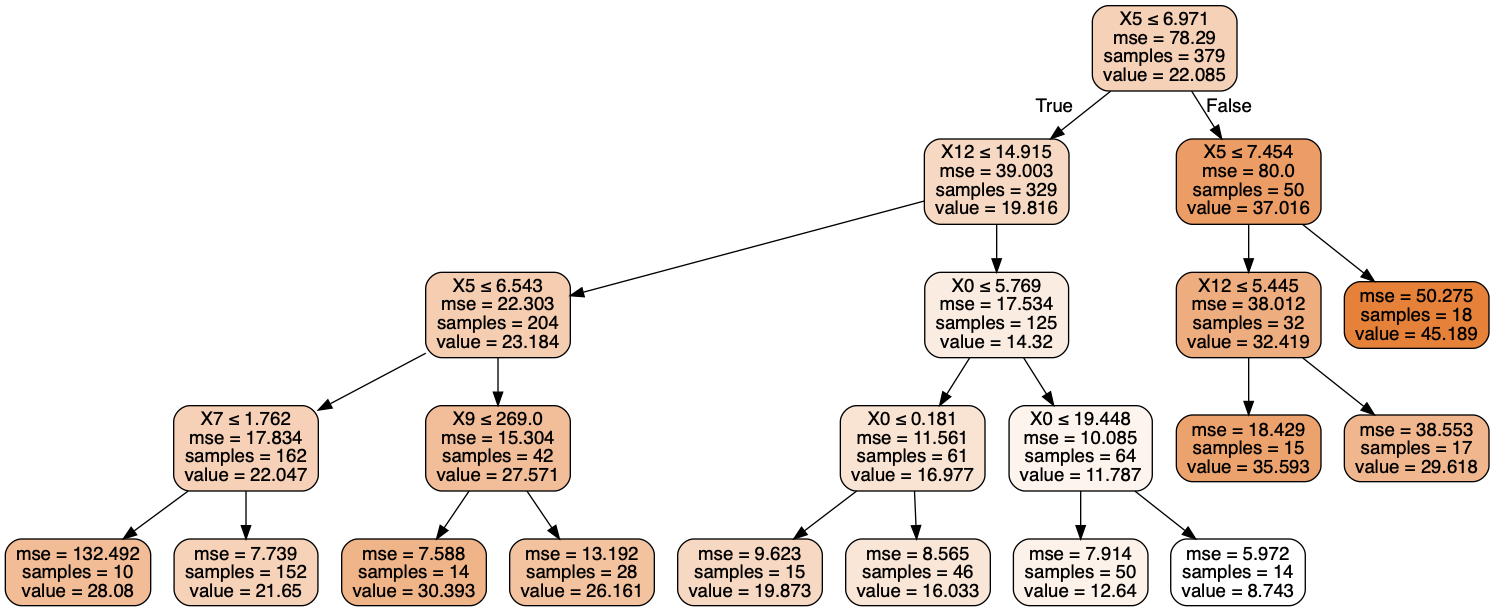

In [26]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [27]:
#wine output為酒的種類----分類問題
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)
clf = DecisionTreeClassifier(max_depth=4,min_samples_split=20,min_samples_leaf=10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [28]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.8444444444444444


In [29]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.         0.         0.         0.0021344  0.         0.
 0.         0.         0.00752243 0.44743603 0.         0.05943276
 0.48347439]


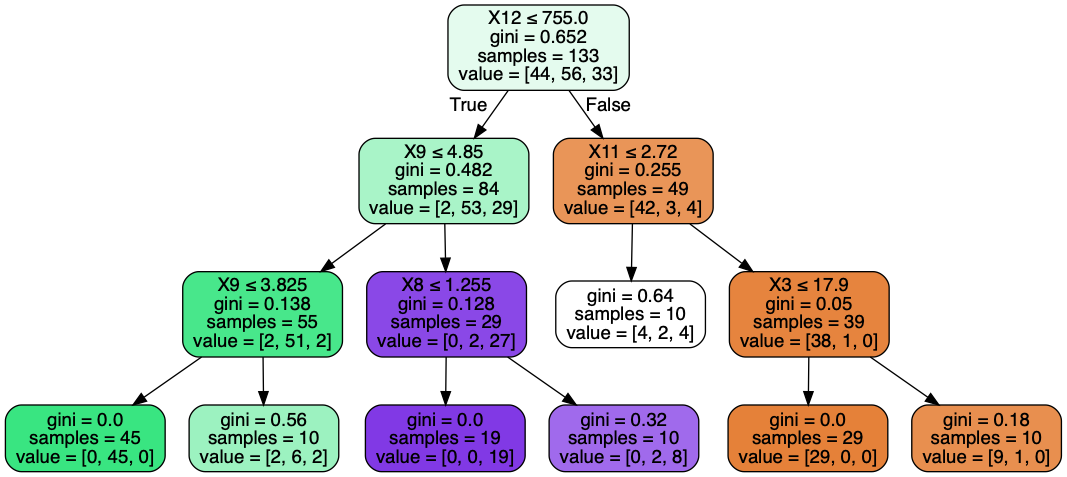

In [30]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())